In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

# Importo il drugset
file_path = r'C:\Users\nilon\Downloads\Tesina Nilo Netti 307387 e Martino Giovannetti 307480 (1)\Tesina Nilo Netti 307387 e Martino Giovannetti 307480drug_consumption.data'
column_names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Cscore', 'Ascore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']
drugs = pd.read_csv(file_path, header=None, names=column_names)

columns_to_drop = ['ID','VSA', 'Semeron', 'Methadone', 'Heroin', 'Ketamine', 'Crack', 'Benzos', 'Legalh', 'Amyl']
drugs = drugs.drop(columns=columns_to_drop)

column_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Cscore', 'Ascore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Caffeine', 'Cannabis', 'Choc', 'Coke', 'Ecstasy', 'LSD', 'Mushrooms', 'Nicotine']


# Visualizzo drugset
drugs.head(6)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Ascore,...,Alcohol,Amphet,Caffeine,Cannabis,Choc,Coke,Ecstasy,LSD,Mushrooms,Nicotine
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL5,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL2
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL5,CL2,CL6,CL4,CL6,CL3,CL4,CL2,CL0,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL6,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL1,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL4,CL0,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL4,CL1,CL6,CL3,CL6,CL0,CL1,CL0,CL2,CL2
5,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL2,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL6


In [ ]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Cscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Caffeine   1885 non-null   object 
 15  Cannabis   1885 non-null   object 
 16  Choc       1885 non-null   object 
 17  Coke       1885 non-null   object 
 18  Ecstasy    1885 non-null   object 
 19  LSD        1885 non-null   object 
 20  Mushroom

In [ ]:
dizionario = {f"CL{i}" : i for i in range(7)}
print(dizionario)

{'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6}


### Label encoding

In [ ]:

columns_to_map = column_names[12:22]

for i in columns_to_map:
     drugs[i] = drugs[i].map(dizionario)

display(drugs)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Ascore,...,Alcohol,Amphet,Caffeine,Cannabis,Choc,Coke,Ecstasy,LSD,Mushrooms,Nicotine
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,5,2,6,0,5,0,0,0,0,2
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,5,2,6,4,6,3,4,2,0,4
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,6,0,6,3,4,0,0,0,1,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,4,0,5,2,4,2,0,0,0,2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,4,1,6,3,6,0,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,5,0,4,5,4,0,0,3,0,0
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,5,0,5,3,4,0,2,5,4,5
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,4,6,6,6,6,4,4,2,2,6
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,5,0,6,6,5,0,3,3,3,4


In [ ]:
drugs.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Ascore,...,Alcohol,Amphet,Caffeine,Cannabis,Choc,Coke,Ecstasy,LSD,Mushrooms,Nicotine
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,...,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,...,4.635013,1.340584,5.483820,2.989390,5.106631,1.161273,1.314058,1.061538,1.187268,3.200531
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,...,1.331253,1.783587,1.114648,2.287438,1.089315,1.513031,1.647567,1.491103,1.466341,2.413932
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,...,4.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,...,5.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,...,6.000000,2.000000,6.000000,5.000000,6.000000,2.000000,3.000000,2.000000,2.000000,6.000000
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


Dimensioni dataset

In [ ]:
M,N = drugs.shape
print(f"Il dataset ha {M} righe e {N} colonne")

Il dataset ha 1885 righe e 22 colonne


Controllo bilanciamento del dataset, plotto le frequenze

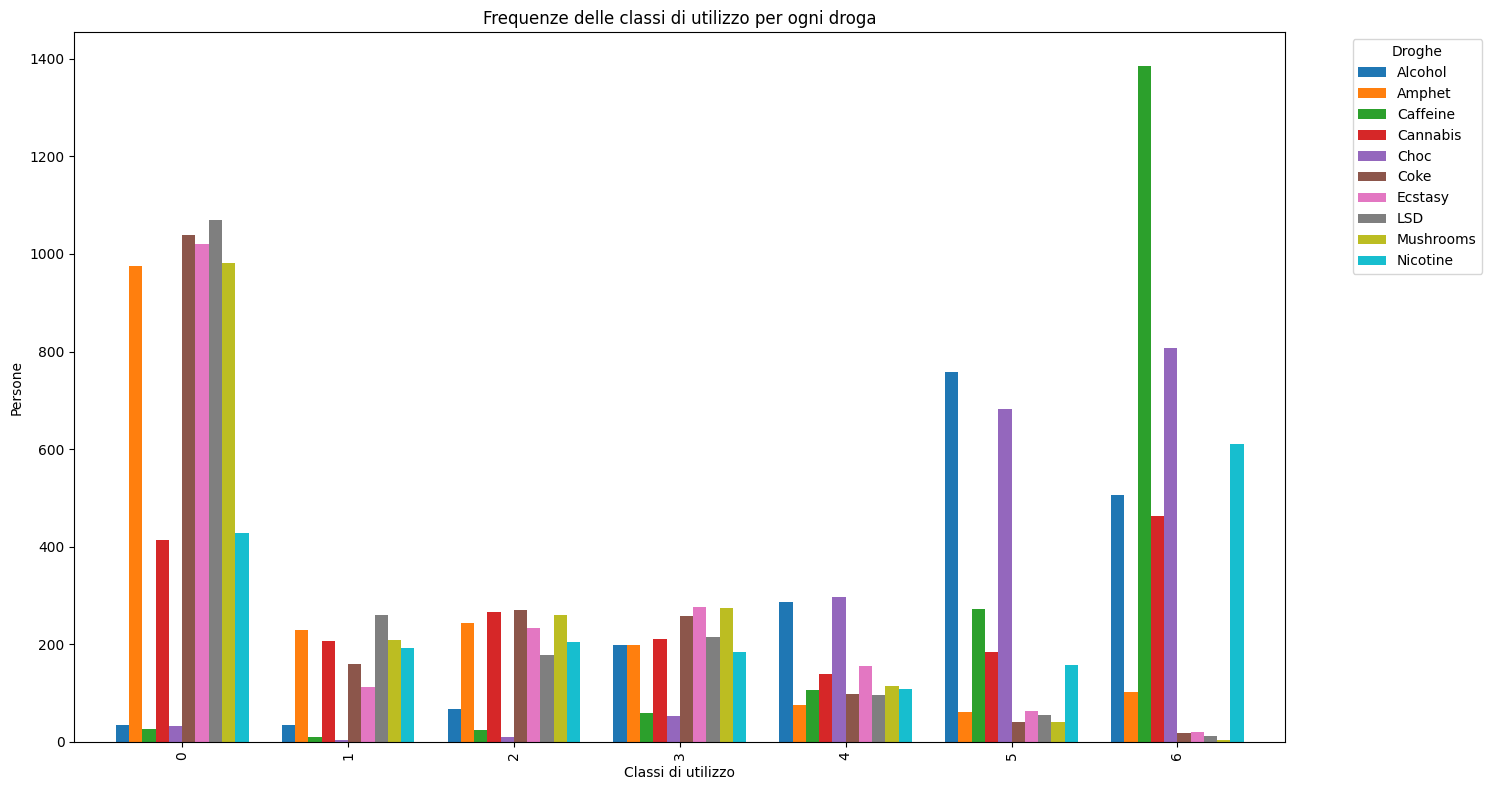

In [ ]:
frequenze = {col: drugs[col].value_counts().sort_index() for col in columns_to_map}
frequenze_df = pd.DataFrame(frequenze).fillna(0).astype(int)
frequenze_df.plot(kind='bar', figsize=(15, 8), width=0.8)
plt.title('Frequenze delle classi di utilizzo per ogni droga')
plt.xlabel('Classi di utilizzo')
plt.ylabel('Persone')
plt.legend(title='Droghe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Calcolo delle frequenze relative
try:
    frequenze_relative = frequenze_df / M
    display(frequenze_relative.style.format('{:.2%}').set_caption('Frequenze Relative'))
except Exception as e:
    print(f"Errore durante il calcolo o la visualizzazione delle frequenze relative: {e}")

,Alcohol,Amphet,Caffeine,Cannabis,Choc,Coke,Ecstasy,LSD,Mushrooms,Nicotine
0,1.80%,51.78%,1.43%,21.91%,1.70%,55.07%,54.16%,56.71%,52.10%,22.71%
1,1.80%,12.20%,0.53%,10.98%,0.16%,8.49%,5.99%,13.74%,11.09%,10.24%
2,3.61%,12.89%,1.27%,14.11%,0.53%,14.32%,12.41%,9.39%,13.79%,10.82%
3,10.50%,10.50%,3.18%,11.19%,2.86%,13.69%,14.69%,11.35%,14.59%,9.81%
4,15.23%,3.98%,5.62%,7.43%,15.70%,5.25%,8.28%,5.15%,6.10%,5.73%
5,40.27%,3.24%,14.48%,9.81%,36.23%,2.18%,3.34%,2.97%,2.12%,8.33%
6,26.79%,5.41%,73.47%,24.56%,42.81%,1.01%,1.11%,0.69%,0.21%,32.36%


Analisi della distribuzione delle variabili numeriche con istogrammi

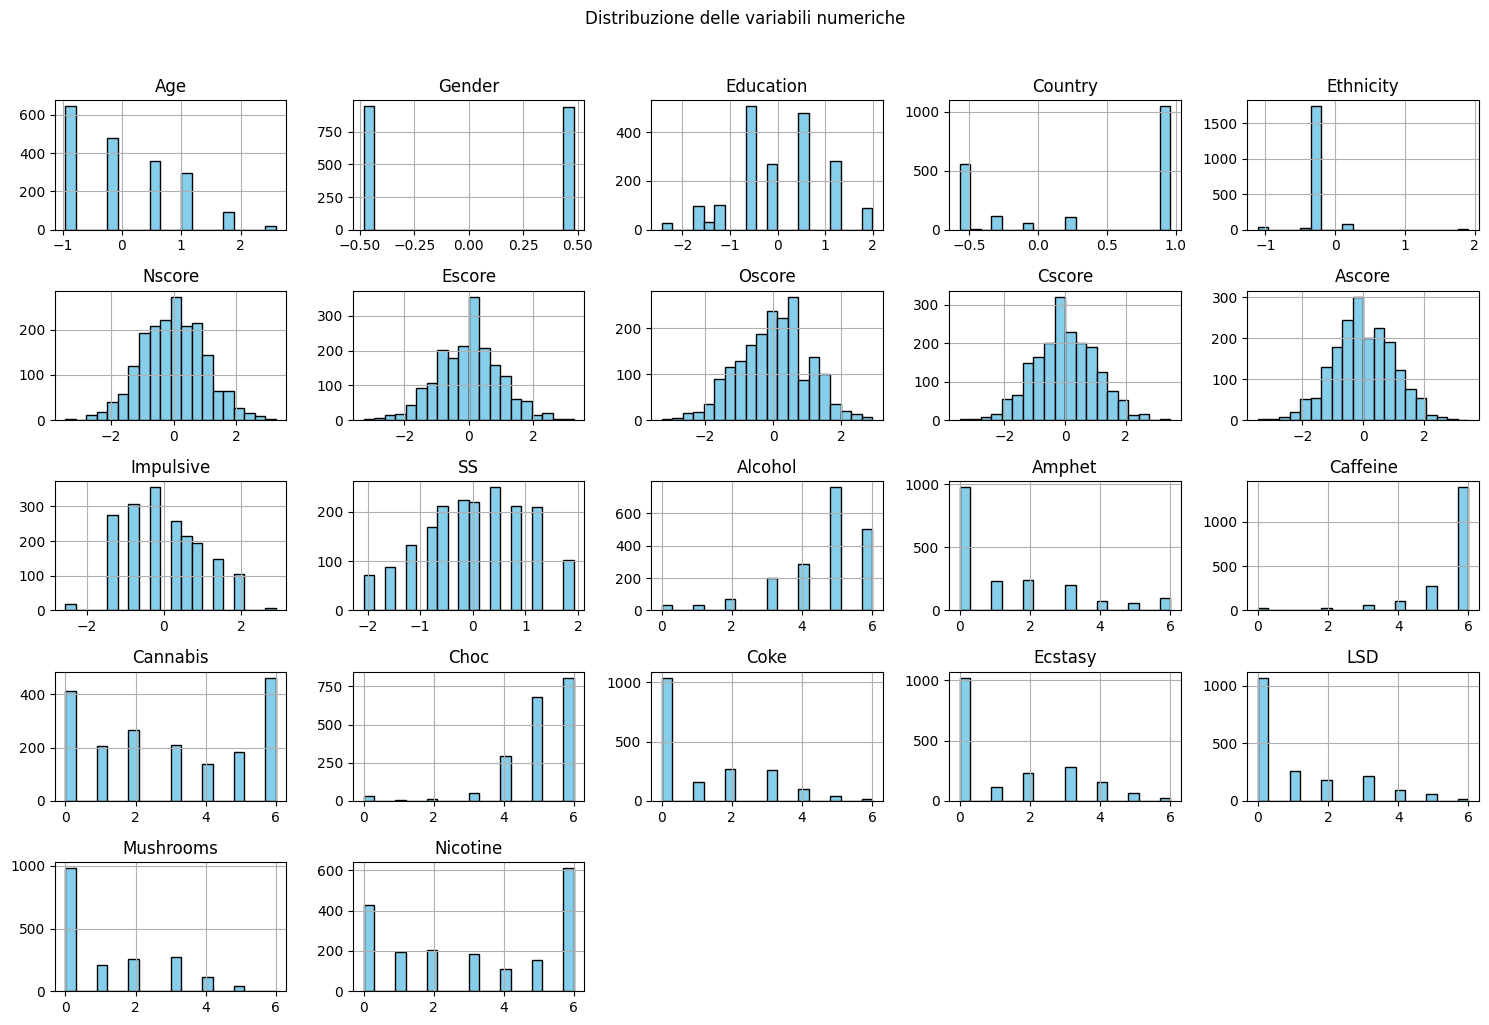

In [ ]:
# Istogrammi per le variabili numeriche con layout migliorato
drugs.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribuzione delle variabili numeriche", y=1.02)
plt.tight_layout()
plt.show()

Divisione di training + validation set

In [ ]:

feature_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                'Nscore', 'Escore', 'Oscore', 'Cscore', 'Ascore', 'Impulsive', 'SS']
target_columns = columns_to_map  # Le droghe che hai già mappato


# Estraiamo features e target
X = drugs[feature_columns].copy()
y = drugs[target_columns].copy()

print(f"\nShape features (X): {X.shape}")
print(f"Shape target (y): {y.shape}")

# Divido test set e validation + training set
test_size=0.15
validation_size = 0.2
training_size = 0.65

X_trainval, X_test, y_trainval, y_test = train_test_split(
X, y, 
test_size=test_size,
random_state=42,
shuffle=True
)



Shape features (X): (1885, 12)
Shape target (y): (1885, 10)




## Principal Component Analysis (PCA)

L'idea alla base della PCA è quella di diminuire le dimensioni dello spazio delle features, minimizzando la perdita di varianza (cioè informazione) dei dati.
I nostri dati vengono pensati come punti in uno spazio $\mathbb{R}^d$ dove $d$ è il numero di features che li caratterizzano.
In generale è computazionalmente dispendioso lavorare in spazi di alte dimensioni, inoltre i dati tendono a diventare molto sparsi ed alcuni algoritmi perdono di significato ed efficienza.

### Intuizione geometrica

La PCA trova la direzione di **massima varianza** nei dati. In 2D, questo significa trovare la retta che meglio approssima i dati minimizzando gli errori di proiezione.

La direzione ottimale per la proiezione è quella lungo cui i dati hanno la **varianza più grande**. Preservare la direzione con più varianza significa mantenere il massimo dell'informazione.

### Algebra lineare per la derivazione

Consideriamo uno spazio $V$ di dimensione $d$ e un sottospazio $W$ di dimensione $k < d$.
Possiamo sempre trovare un set di $k$ vettori $\{e_1, e_2, \ldots, e_k\}$ che formano una **base ortonormale** per $W$:
$$\langle e_i, e_j \rangle = \delta_{ij} = \begin{cases} 
1 & \text{se } i = j \\ 
0 & \text{se } i \neq j 
\end{cases}$$

Qualsiasi vettore in $W$ può essere scritto come:
$$\sum_{i=1}^k \alpha_i e_i$$

### Derivazione formale della PCA

Sia $D = \{x_1, x_2, \dots, x_n\} \subset \mathbb{R}^d$ il dataset.

#### Passo 1: Centrare i dati

Per derivare la PCA, è conveniente proiettare su un sottospazio $W$ che passa per l'origine. Quindi spostiamo il centro di massa all'origine:
$$x_j' = x_j - \mu, \quad \text{dove } \mu = \frac{1}{n}\sum_{j=1}^n x_j$$

#### Passo 2: Formulazione del problema

Vogliamo trovare la rappresentazione più accurata dei dati $D = \{x_1, x_2, \ldots, x_n\}$ in un sottospazio $W$ di dimensione $k < d$.

Sia $\{e_1, e_2, \ldots, e_k\}$ la base ortonormale per $W$. Ogni $x_j$ sarà rappresentato da un vettore in $W$:
$$\hat{x}_j = \sum_{i=1}^k \alpha_{ji} e_i$$

L'errore per un singolo punto è:
$$\text{errore}_j = \left\|x_j - \sum_{i=1}^k \alpha_{ji} e_i\right\|^2$$

#### Passo 3: Errore totale

L'errore totale per tutti i dati è:
$$J(e_1, \ldots, e_k, \alpha_{11}, \ldots, \alpha_{nk}) = \sum_{j=1}^n \left\|x_j - \sum_{i=1}^k \alpha_{ji} e_i\right\|^2$$

#### Passo 4: Ottimizzazione rispetto ai coefficienti

Per minimizzare $J$, deriviamo rispetto ad $\alpha_{ml}$:
$$\frac{\partial J}{\partial \alpha_{ml}} = -2e_l^T x_m + 2\alpha_{ml} = 0$$

Da cui otteniamo il valore ottimale:
$$\alpha_{ml} = e_l^T x_m$$

#### Passo 5: Sostituzione e semplificazione

Sostituendo i valori ottimali di $\alpha_{ml}$ in $J$:
$$J = \sum_{j=1}^n \|x_j\|^2 - \sum_{j=1}^n \sum_{i=1}^k (e_i^T x_j)^2$$

Usando $(a^T b)^2 = (a^T b)(a^T b) = b^T(aa^T)b$:
$$J = \sum_{j=1}^n \|x_j\|^2 - \sum_{j=1}^n \sum_{i=1}^k e_i^T(x_j x_j^T)e_i$$

#### Passo 6: Matrice di scatter

Definiamo la **matrice di scatter**:
$$S = \sum_{j=1}^n x_j x_j^T$$

**Nota:** $S$ è $n-1$ volte la matrice di covarianza campionaria.

Sostituendo nella formula dell'errore:
$$J = \sum_{j=1}^n \|x_j\|^2 - \sum_{i=1}^k e_i^T S e_i$$

Poiché il primo termine $\sum_{j=1}^n \|x_j\|^2$ è costante (non dipende dagli $e_i$), **minimizzare** $J$ equivale a **massimizzare**:
$$\sum_{i=1}^k e_i^T S e_i$$

#### Passo 7: Vincoli ortonormalità e moltiplicatori di Lagrange

Il nostro problema di ottimizzazione è:
- **Massimizzare:** $\sum_{i=1}^k e_i^T S e_i$
- **Soggetto ai vincoli:** $e_i^T e_i = 1$ per ogni $i = 1, \ldots, k$

Questo è un problema di **ottimizzazione vincolata**. I **moltiplicatori di Lagrange** sono una tecnica per trasformare un problema vincolato in uno non vincolato.

Per ogni vincolo $g_i(e_i) = e_i^T e_i - 1 = 0$, introduciamo un moltiplicatore $\lambda_i$ e costruiamo la **funzione Lagrangiana**:

$$u(e_1, \ldots, e_k, \lambda_1, \ldots, \lambda_k) = \sum_{i=1}^k e_i^T S e_i - \sum_{i=1}^k \lambda_i(e_i^T e_i - 1)$$

La funzione $u$ combina:
- La **funzione obiettivo** da massimizzare: $\sum_{i=1}^k e_i^T S e_i$
- I **vincoli penalizzati** dai moltiplicatori: $-\sum_{i=1}^k \lambda_i(e_i^T e_i - 1)$

Derivando rispetto ad $e_m$:
$$\frac{\partial u}{\partial e_m} = 2Se_m - 2\lambda_m e_m = 0$$

Da cui otteniamo:
$$Se_m = \lambda_m e_m$$

Questa è l'**equazione agli autovalori**: gli $e_m$ ottimali sono gli **autovettori** di $S$ e i $\lambda_m$ sono i corrispondenti **autovalori**.
#### Passo 8: Condizioni di ottimalità e scelta degli autovettori

Dall'equazione agli autovalori ottenuta al passo 7:
$$Se_m = \lambda_m e_m$$

abbiamo dimostrato che gli $e_m$ ottimali devono essere **autovettori** di $S$ con autovalori $\lambda_m$.

**Ma quali autovettori scegliere?** La matrice $S$ ha $d$ autovettori, ma noi ne vogliamo solo $k < d$.

Sostituiamo $Se_m = \lambda_m e_m$ nella funzione obiettivo. Ricordiamo che vogliamo massimizzare:
$$\sum_{i=1}^k e_i^T S e_i$$

Per ogni termine:
$$e_i^T S e_i = e_i^T (\lambda_i e_i) = \lambda_i (e_i^T e_i) = \lambda_i \cdot 1 = \lambda_i$$

dove abbiamo usato il vincolo di normalità $e_i^T e_i = 1$.

Quindi la funzione obiettivo diventa:
$$\sum_{i=1}^k e_i^T S e_i = \sum_{i=1}^k \lambda_i$$

**Conclusione:** Per **massimizzare** $\sum_{i=1}^k \lambda_i$, dobbiamo scegliere i $k$ **autovalori più grandi**.

**Soluzione finale:** Ordiniamo gli autovalori in ordine decrescente:
$$\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_d$$

e prendiamo gli autovettori $e_1, e_2, \ldots, e_k$ corrispondenti ai **primi $k$ autovalori più grandi**.

Sostituendo nell'errore originale:
$$J = \sum_{j=1}^n \|x_j\|^2 - \sum_{i=1}^k \lambda_i$$

Massimizzare $\sum_{i=1}^k \lambda_i$ equivale a **minimizzare** l'errore $J$.

### Interpretazione e significato

**Componenti principali:** I coefficienti $\alpha_{mi} = x_m^T e_i$ sono chiamati **componenti principali**.

**Varianza spiegata:** La varianza nella direzione dell'$i$-esimo componente principale è $\lambda_i$.

**Importanza dei componenti:** I componenti sono ordinati per importanza. I primi $k$ componenti più importanti forniscono la migliore approssimazione $k$-dimensionale di $x_i$.

### Trasformazione delle coordinate

**Matrice di proiezione:** Sia $E = [e_1 \quad e_2 \quad \cdots \quad e_k]$.

**Trasformazione:** La rappresentazione $k$-dimensionale è:
$$y = E^T x$$

Sotto $E^T$, gli autovettori diventano la base standard:
$$E^T e_i = \begin{bmatrix} 0 \\ \vdots \\ 1 \\ \vdots \\ 0 \end{bmatrix} \leftarrow \text{posizione } i$$

### Ricetta PCA completa

Dati $D = \{x_1, x_2, \ldots, x_n\}$ con $x_i \in \mathbb{R}^d$. Riduzione a dimensione $k$:

1. **Calcola la media campionaria:** $\hat{\mu} = \frac{1}{n}\sum_{i=1}^n x_i$

2. **Centra i dati:** $z_i = x_i - \hat{\mu}$

3. **Calcola la matrice di scatter:** $S = \sum_{i=1}^n z_i z_i^T$

4. **Calcola autovettori:** Trova $e_1, e_2, \ldots, e_k$ corrispondenti ai $k$ autovalori più grandi di $S$

5. **Forma la matrice di proiezione:** $E = [e_1 \quad e_2 \quad \cdots \quad e_k]$

6. **Trasforma i dati:** $y = E^T z$ è la rappresentazione $k$-dimensionale più vicina a $x$

### Regola pratica per la scelta di $k$

Mantieni abbastanza componenti per spiegare l'85% della variazione:
$$\frac{\sum_{j=1}^k \lambda_j}{\sum_{j=1}^d \lambda_j} \geq 0.85$$


Tuttavia nel nostro caso, eseguire la PCA non è fondamentale a fini pratici, esserndo lo spazio delle features di sole 12 dimensioni. Ci limiteremo ad eseguire questa tecnica al solo fine di esplorare il dataset, e comprendere quali di esse sono più impoattanti al fine di massimizzare l'imìnformazione contenuta nei dati.

,numero di componenti mantenute,varianza spiegata
0,8,0.851567


Componente 1: 0.2429 varianza spiegata
Componente 2: 0.1551 varianza spiegata
Componente 3: 0.0946 varianza spiegata
Componente 4: 0.0890 varianza spiegata
Componente 5: 0.0802 varianza spiegata
Componente 6: 0.0713 varianza spiegata
Componente 7: 0.0636 varianza spiegata
Componente 8: 0.0548 varianza spiegata


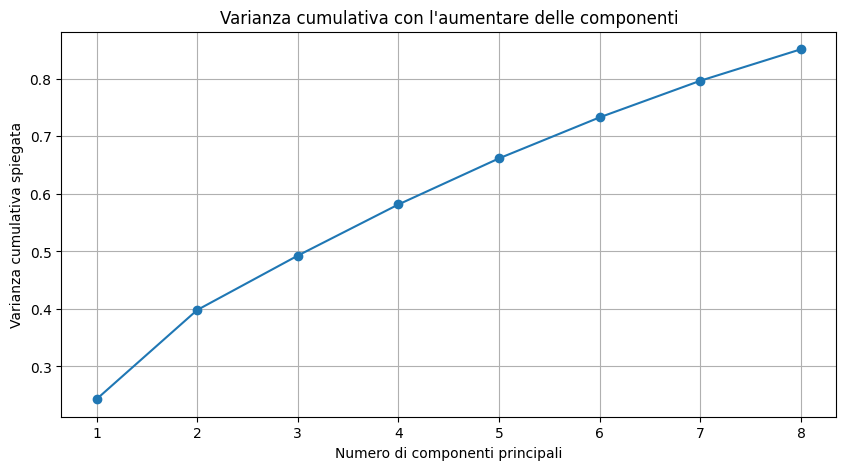

In [ ]:
X_trainval_non_scaled = X_trainval.copy()
X_test_non_scaled = X_test.copy()

scaler = StandardScaler()

X_trainval = scaler.fit_transform(X_trainval)
X_test = scaler.transform(X_test)


pca = PCA(0.85)
pca.fit(X_trainval)



display(pd.DataFrame({'numero di componenti mantenute' : [pca.n_components_], 'varianza spiegata': [pca.explained_variance_ratio_.sum()]}))
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i+1}: {var:.4f} varianza spiegata")

X_trainval = X_trainval.copy()
X_trainval_pca = pca.transform(X_trainval)

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza cumulativa spiegata')
plt.title('Varianza cumulativa con l\'aumentare delle componenti')
plt.xticks(range(pca.n_components_), range(1, pca.n_components_+1))
plt.grid()
plt.show()




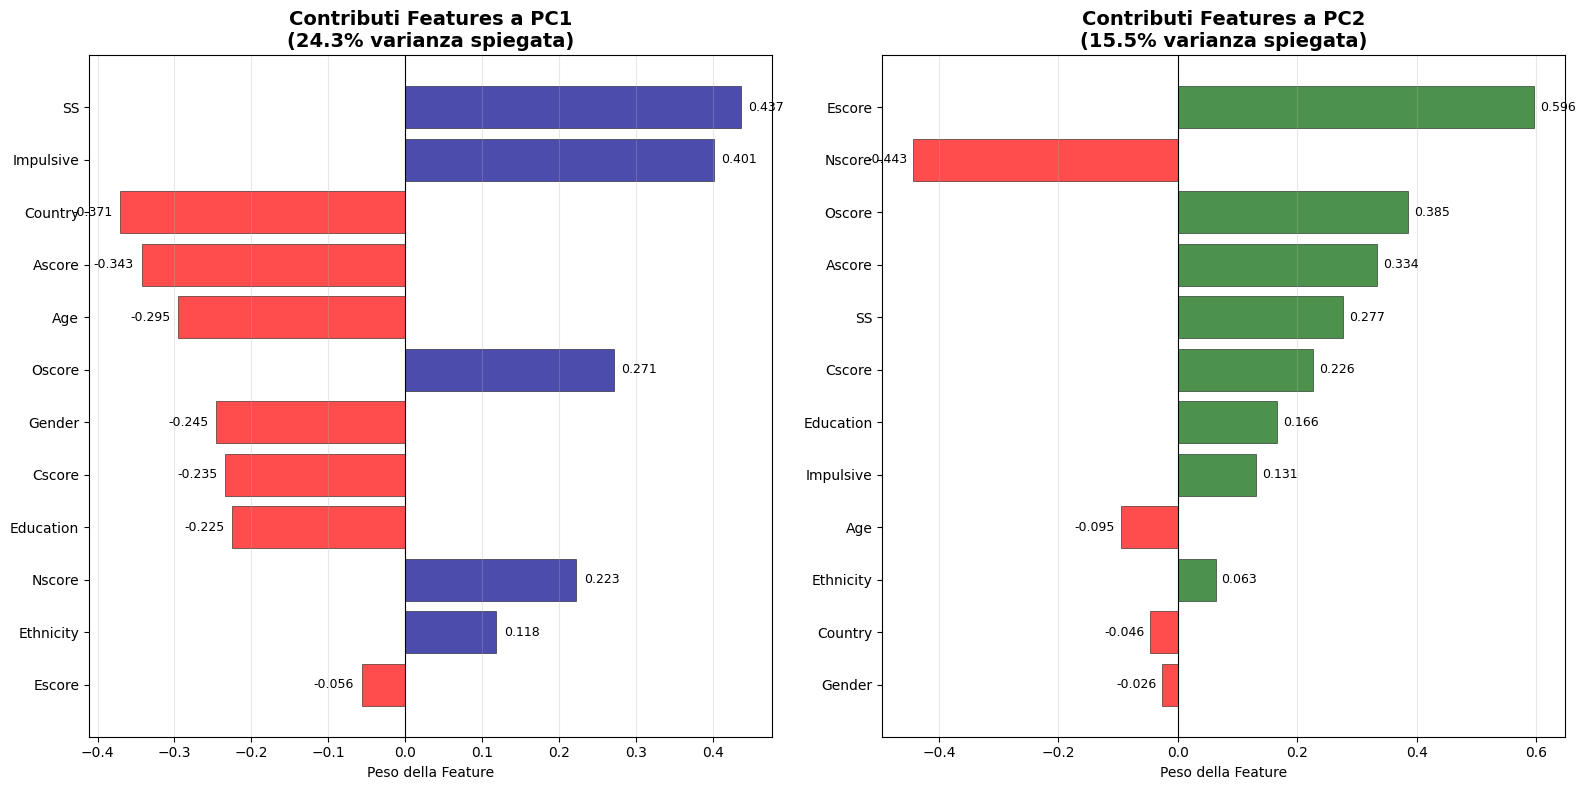

In [ ]:
# Mostriamo i contributi delle features alle prime due componenti principali

feature_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                'Nscore', 'Escore', 'Oscore', 'Cscore', 'Ascore', 'Impulsive', 'SS']

contributions_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1_Weight': pca.components_[0],
    'PC2_Weight': pca.components_[1],
    'PC1_Abs': np.abs(pca.components_[0]),
    'PC2_Abs': np.abs(pca.components_[1])
})

contributions_df = contributions_df.sort_values('PC1_Abs', ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

colors_pc1 = ['red' if x < 0 else 'darkblue' for x in contributions_df['PC1_Weight']]
bars1 = ax1.barh(range(len(contributions_df)), contributions_df['PC1_Weight'], 
                 color=colors_pc1, alpha=0.7, edgecolor='black', linewidth=0.5)

ax1.set_yticks(range(len(contributions_df)))
ax1.set_yticklabels(contributions_df['Feature'])
ax1.set_xlabel('Peso della Feature')
ax1.set_title(f'Contributi Features a PC1\n({pca.explained_variance_ratio_[0]*100:.1f}% varianza spiegata)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')
ax1.axvline(x=0, color='black', linewidth=0.8)

for i, (bar, value) in enumerate(zip(bars1, contributions_df['PC1_Weight'])):
    ax1.text(value + (0.01 if value >= 0 else -0.01), i, f'{value:.3f}', 
             va='center', ha='left' if value >= 0 else 'right', fontsize=9)

contributions_df_pc2 = contributions_df.sort_values('PC2_Abs', ascending=True)
colors_pc2 = ['red' if x < 0 else 'darkgreen' for x in contributions_df_pc2['PC2_Weight']]
bars2 = ax2.barh(range(len(contributions_df_pc2)), contributions_df_pc2['PC2_Weight'], 
                 color=colors_pc2, alpha=0.7, edgecolor='black', linewidth=0.5)

ax2.set_yticks(range(len(contributions_df_pc2)))
ax2.set_yticklabels(contributions_df_pc2['Feature'])
ax2.set_xlabel('Peso della Feature')
ax2.set_title(f'Contributi Features a PC2\n({pca.explained_variance_ratio_[1]*100:.1f}% varianza spiegata)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')
ax2.axvline(x=0, color='black', linewidth=0.8)

for i, (bar, value) in enumerate(zip(bars2, contributions_df_pc2['PC2_Weight'])):
    ax2.text(value + (0.01 if value >= 0 else -0.01), i, f'{value:.3f}', 
             va='center', ha='left' if value >= 0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()


# Neural Networks e Addestramento

## Cos'è un Multi-Layer Perceptron (MLP)

Un **Multi-Layer Perceptron (MLP)** è una rete neurale artificiale che appartiene alla famiglia delle reti **feed-forward**. È composta da:

- **Layer di input** ($l=0$): riceve i dati di ingresso
- **Layer nascosti** (hidden layers): elaborano le informazioni attraverso trasformazioni non lineari  
- **Layer di output** ($l=L$): produce le predizioni finali

### Struttura matematica

Ogni layer $l$ è caratterizzato da:
- **Trasformazione lineare**: $\mathbf{z}_l = \mathbf{W}_l \mathbf{a}_{l-1} + \mathbf{b}_l$
- **Funzione di attivazione**: $\mathbf{a}_l = S_l(\mathbf{z}_l)$

dove $\mathbf{W}_l$ sono i pesi, $\mathbf{b}_l$ i bias, e $S_l$ la funzione di attivazione.

L'output finale è ottenuto tramite **composizione di funzioni**:
$$\mathbf{g}(\mathbf{x}) = S_L \circ M_L \circ \cdots \circ S_2 \circ M_2 \circ S_1 \circ M_1(\mathbf{x})$$

dove $M_l(\mathbf{z}) = \mathbf{W}_l \mathbf{z} + \mathbf{b}_l$.

### A cosa serve

L'MLP è un **approssimatore universale** che può:
- **Classificazione**: distinguere tra diverse classi (es. riconoscimento immagini)
- **Regressione**: predire valori continui (es. prezzi immobiliari)
- **Riconoscimento di pattern**: identificare strutture complesse nei dati

La sua forza sta nella capacità di apprendere **relazioni non lineari** attraverso la composizione di trasformazioni semplici.

## Funzioni di Attivazione

Le funzioni di attivazione introducono **non linearità** nella rete:

- **ReLU**: $f(z) = \max(0, z)$ - più usata, evita il problema della saturazione
- **Sigmoid**: $f(z) = \frac{1}{1 + e^{-z}}$ - output tra 0 e 1
- **Softmax**: per classificazione multi-classe, produce probabilità

## Back-propagation: L'Algoritmo Fondamentale

La **back-propagation** è l'algoritmo che permette di calcolare efficientemente i gradienti necessari per l'addestramento delle reti neurali.

### Il Problema

Vogliamo minimizzare la **loss function**:
$$L(\boldsymbol{\theta}) = \frac{1}{n}\sum_{i=1}^n \text{Loss}(\mathbf{y}_i, \mathbf{g}(\mathbf{x}_i | \boldsymbol{\theta}))$$

dove $\boldsymbol{\theta} = \{\mathbf{W}_l, \mathbf{b}_l\}_{l=1}^L$ sono tutti i parametri della rete.

Per applicare la **gradient descent**, abbiamo bisogno di:
$$\frac{\partial L}{\partial \mathbf{W}_l} \quad \text{e} \quad \frac{\partial L}{\partial \mathbf{b}_l} \quad \text{per ogni layer } l$$

#### Come calcolarli:

**Siano a e z i vettori ottenuti durante la feed-forward propagation:**

$$\mathbf{x} \rightarrow \mathbf{z}_1 \rightarrow \mathbf{a}_1 \rightarrow \mathbf{z}_2 \rightarrow \mathbf{a}_2 \rightarrow \cdots \rightarrow \mathbf{z}_L \rightarrow \mathbf{a}_L = \mathbf{g}(\mathbf{x})$$

Allora  i gradienti sono:
$$\frac{\partial L}{\partial \mathbf{W}_l} = \boldsymbol{\delta}_l \mathbf{a}_{l-1}^T \quad \text{e} \quad \frac{\partial L}{\partial \mathbf{b}_l} = \boldsymbol{\delta}_l$$

Dove: $$\boldsymbol{\delta}_l = \frac{\partial L}{\partial \mathbf{z}_l}$$  è calcolato ricorsivamente a partire da L:

$$\boldsymbol{\delta}_L = \frac{\partial S_L}{\partial \mathbf{z}_L} \frac{\partial L}{\partial \mathbf{g}}$$ 
e 
$$\boldsymbol{\delta}_{l} = \mathbf{D}_{l} \mathbf{W}_{l+1}^T \boldsymbol{\delta}_{l+1}$$
dove $\mathbf{D}_l = \text{diag}(S'(\mathbf{z}_{l,1}), \ldots, S'(\mathbf{z}_{l,p_l}))$.

## Algoritmi di Ottimizzazione

### Gradient Descent (Batch)
$$\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_t - \alpha \nabla L(\boldsymbol{\theta}_t)$$

Il **Gradient Descent classico** (o Batch Gradient Descent) calcola il gradiente usando **tutto il dataset**:
$$\nabla L(\boldsymbol{\theta}) = \frac{1}{n}\sum_{i=1}^n \nabla \text{Loss}(\mathbf{y}_i, \mathbf{g}(\mathbf{x}_i | \boldsymbol{\theta}))$$

**Vantaggi:**
- Convergenza **stabile** e **deterministica**
- Gradiente è la direzione di discesa **ottimale**
- Buone proprietà teoriche di convergenza

**Svantaggi:**
- **Lento** per dataset grandi (milioni di esempi)
- Richiede calcolare la loss su **tutti** gli esempi ad ogni iterazione

### Stochastic Gradient Descent (SGD)
Invece di usare tutto il dataset, usa **mini-batch** di dimensione $N \ll n$:
$$\nabla L(\boldsymbol{\theta}) \approx \frac{1}{N}\sum_{i \in \text{batch}} \nabla \text{Loss}(\mathbf{y}_i, \mathbf{g}(\mathbf{x}_i | \boldsymbol{\theta}))$$

**Come funziona:**
1. **Stocasticità**: mescola casualmente il dataset
2. **Partizionamento**: divide in mini-batch di dimensione $N$ (es. 32, 64, 128)
3. **Aggiornamento**: per ogni mini-batch calcola gradiente e aggiorna pesi
4. **Epoca completa**: quando tutti i mini-batch sono stati processati

**Vantaggi:**
- **Velocità**: aggiornamenti frequenti accelerano la convergenza
- **Memoria efficiente**: processa solo $N$ esempi alla volta
- **Regolarizzazione implicita**: il "rumore" aiuta a evitare minimi locali

**Svantaggi:**
- **Convergenza rumorosa**: oscillazioni attorno al minimo

## Parametri di Controllo dell'Addestramento

### Epoche Massime (`max_iter`)
- **Definizione**: numero massimo di passaggi completi attraverso il training set
- **Scopo**: evitare addestramento infinito

### Learning Rate (`learning_rate_init`)
- **Definizione**: dimensione del passo $\alpha$ nell'aggiornamento dei pesi
- **Effetto**: 
  - Troppo alto → instabilità, oscillazioni
  - Troppo basso → convergenza molto lenta
- **Valori tipici**: 0.001-0.1

### Patience (`n_iter_no_change`)
- **Definizione**: numero di epoche da aspettare senza miglioramento prima di fermarsi
- **Scopo**: evitare overfitting
- **Come funziona**: 
  - Monitora la loss sul validation set dopo ogni epoca
  - Se non migliora per `patience` epoche consecutive → **STOP**
  - Previene che la rete "memorizzi" il training set

### Tolerance (`tol`)
- **Definizione**: soglia minima di miglioramento per considerare significativo un progresso
- **Scopo**: evitare micro-oscillazioni e dichiarare convergenza
- **Matematicamente**: se $|L_{t} - L_{t-1}| < \text{tol}$ → convergenza

## Prevenzione dell'Overfitting

### Early Stopping
Ferma l'addestramento quando:
- La validation loss smette di migliorare (patience)
- Il gap tra training e validation loss aumenta troppo

### Regularization
- **L1/L2 regularization**: $L(\boldsymbol{\theta}) + \lambda \|\boldsymbol{\theta}\|^2$
- **Dropout**: disattiva casualmente alcuni neuroni durante l'addestramento

### Cosa Succede Internamente a mlpClassifier

1. **Inizializzazione**: pesi casuali per $\mathbf{W}_l, \mathbf{b}_l$
2. **Per ogni epoca**:
   - **Forward pass**: calcola predizioni per tutto il training set
   - **Back-propagation**: calcola gradienti $\frac{\partial L}{\partial \mathbf{W}_l}, \frac{\partial L}{\partial \mathbf{b}_l}$
   - **Update**: $\mathbf{W}_l \leftarrow \mathbf{W}_l - \alpha \frac{\partial L}{\partial \mathbf{W}_l}$
   - **Validation**: valuta performance su validation set
   - **Early stopping check**: se non migliora per `patience` epoche → stop

Ciò che faremo adesso sarà addestrare un mlp **multiclasse**, cioè una struttura leggermente più complessa, contenente un mlp per ciascuna sostanza stupefacente, 10 in totale. L'output sarà dunque un vettore di 10 elementi, ciascuno dei quali rappresenta il risultato degli mlp interni. 
Tuttavia vedremo che il riaultato di questo multi-mlp sarà scadente poichè il dataset è **estremamente sbilanciato** per maggior parte dei target, perciò il modello impara a predire sempre la risposta "più conveniente" cioè la classe nettamente maggioritaria.

In [ ]:
hidden_layer_sizes = [16]
activation = 'relu'
patience = 75
max_epochs = 5000
batch_size = 8

mlp1 = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation=activation,
    max_iter=max_epochs,
    batch_size=batch_size,
    verbose=True,
    early_stopping=True,
    validation_fraction=validation_size,
    n_iter_no_change=patience,
    random_state=42,
    solver='adam',
)

multi_target_mlp1 = MultiOutputClassifier(mlp1)
multi_target_mlp1.fit(X_trainval, y_trainval)

Iteration 1, loss = 1.97817880
Validation score: 0.193146
Iteration 2, loss = 1.63973272
Validation score: 0.299065
Iteration 3, loss = 1.53973014
Validation score: 0.376947
Iteration 4, loss = 1.50039009
Validation score: 0.380062
Iteration 5, loss = 1.47796188
Validation score: 0.383178
Iteration 6, loss = 1.46164300
Validation score: 0.376947
Iteration 7, loss = 1.45005020
Validation score: 0.373832
Iteration 8, loss = 1.44109775
Validation score: 0.376947
Iteration 9, loss = 1.43370914
Validation score: 0.386293
Iteration 10, loss = 1.42795460
Validation score: 0.389408
Iteration 11, loss = 1.42240114
Validation score: 0.383178
Iteration 12, loss = 1.41741041
Validation score: 0.389408
Iteration 13, loss = 1.41332979
Validation score: 0.383178
Iteration 14, loss = 1.40974794
Validation score: 0.367601
Iteration 15, loss = 1.40559203
Validation score: 0.370717
Iteration 16, loss = 1.40292664
Validation score: 0.392523
Iteration 17, loss = 1.39929318
Validation score: 0.386293
Iterat

MultiOutputClassifier(estimator=MLPClassifier(batch_size=8, early_stopping=True,
                                              hidden_layer_sizes=[16],
                                              max_iter=5000,
                                              n_iter_no_change=75,
                                              random_state=42,
                                              validation_fraction=0.2,
                                              verbose=True))

In [ ]:
# Predizioni del modello multi-target
y_pred_trainval = multi_target_mlp1.predict(X_trainval)  # Predizioni training+validation
y_pred = multi_target_mlp1.predict(X_test)              # Predizioni test set

# Dizionari per memorizzare l'accuratezza per ogni droga
train_accuracies = {}
test_accuracies = {}

for i, drug in enumerate(target_columns):
    # Accuratezza per training+validation set
    acc_trainval = accuracy_score(y_trainval.iloc[:, i], y_pred_trainval[:, i])
    train_accuracies[drug] = acc_trainval
    
    # Accuratezza per test set
    acc_test = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    test_accuracies[drug] = acc_test

# DataFrame: droghe come colonne, train/test come righe
df_accuracy = pd.DataFrame([train_accuracies, test_accuracies], 
                          index=['Train+Val', 'Test'])

# Accuratezza media
mean_acc_trainval = df_accuracy.loc['Train+Val'].mean()
mean_acc_test = df_accuracy.loc['Test'].mean()

# Colonna con medie
df_accuracy['MEDIA'] = [mean_acc_trainval, mean_acc_test]
display(df_accuracy.round(4))

,Alcohol,Amphet,Caffeine,Cannabis,Choc,Coke,Ecstasy,LSD,Mushrooms,Nicotine,MEDIA
Train+Val,0.4195,0.5618,0.7372,0.4663,0.4744,0.5793,0.5762,0.6117,0.5961,0.4014,0.5424
Test,0.3710,0.4735,0.7279,0.4240,0.3958,0.5760,0.5406,0.5830,0.5124,0.3640,0.4968


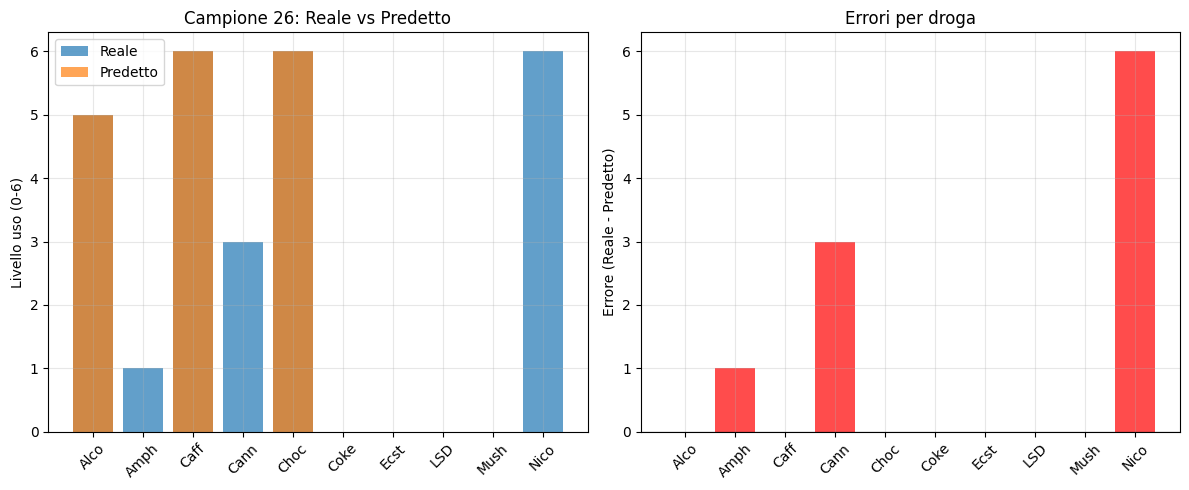

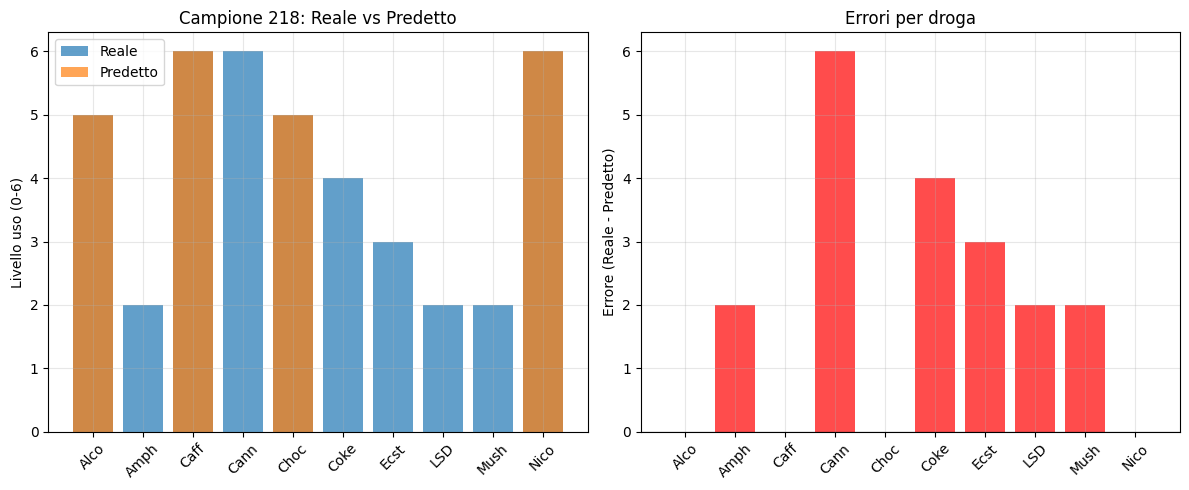

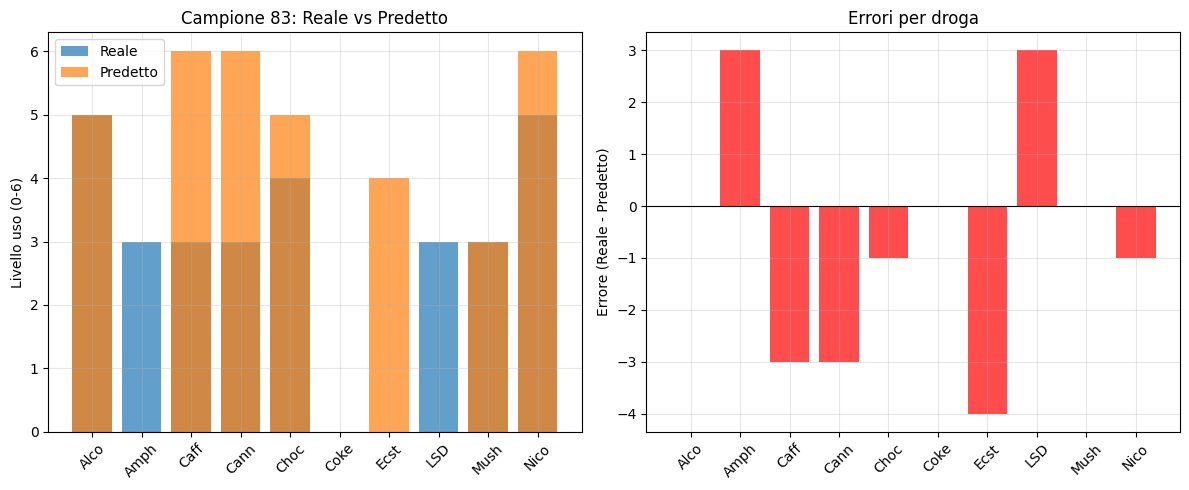

In [ ]:
# Estraiamo 3 campioni casuali dal test set e analizziamo le previsioni

drug_names_short = []
for drug in target_columns:
   if len(drug) <= 4:
       drug_names_short.append(drug)
   else:
       drug_names_short.append(drug[:4])  # Prime 4 lettere

n_randsamples = 3
ind_test_rand = np.random.choice(len(y_test), n_randsamples, replace=False)

rand_samples_pca = X_test[ind_test_rand, :]
rand_targets = y_test.iloc[ind_test_rand]

y_pred_rand_samples = multi_target_mlp1.predict(rand_samples_pca)

try:
   rand_samples_proba = []
   for estimator in multi_target_mlp1.estimators_:
       proba = estimator.predict_proba(rand_samples_pca)
       rand_samples_proba.append(proba)
except:
   rand_samples_proba = None

for i in range(n_randsamples):
   fig, axs = plt.subplots(1, 2, figsize=(12, 5))
   
   axs[0].bar(np.arange(len(target_columns)), rand_targets.iloc[i], alpha=0.7, label='Reale')
   axs[0].bar(np.arange(len(target_columns)), y_pred_rand_samples[i], alpha=0.7, label='Predetto')
   axs[0].set_xticks(np.arange(len(target_columns)))
   axs[0].set_xticklabels(drug_names_short, rotation=45, fontsize=10)
   axs[0].set_ylabel('Livello uso (0-6)')
   axs[0].set_title(f'Campione {ind_test_rand[i]}: Reale vs Predetto')
   axs[0].legend()
   axs[0].grid(alpha=0.3)
   
   errors = rand_targets.iloc[i] - y_pred_rand_samples[i]
   colors = ['red' if x != 0 else 'green' for x in errors]
   axs[1].bar(np.arange(len(target_columns)), errors, color=colors, alpha=0.7)
   axs[1].set_xticks(np.arange(len(target_columns)))
   axs[1].set_xticklabels(drug_names_short, rotation=45, fontsize=10)
   axs[1].set_ylabel('Errore (Reale - Predetto)')
   axs[1].set_title('Errori per droga')
   axs[1].axhline(y=0, color='black', linewidth=0.8)
   axs[1].grid(alpha=0.3)
   
   plt.tight_layout()
   plt.show()

### Binary classification

Al fine di ottenere una migliore accuratezza abbiamo semplificato notevolmente il problema.
Passiamo dal fare una classificazaione multi-classe e multi-output ad un problema elementare: selezioniamo una delle sostanze per cui il dataset è meglio bilanciato, **la cannabis**, e raggruppiamo le classi sotto due etichette. Il nuovo problema sarà quello di fare **classificazione binaria**, e lo svolgeremo con due approcci differenti

In [ ]:
# Creiamo una copia del dataset per la classificazione binaria
drugs_Cannabis_binary = drugs.copy()

# Calcoliamo la mediana della frequenza di utilizzo della Cannabis
median_Cannabis = drugs['Cannabis'].median()
print(f"Mediana della frequenza di utilizzo della Cannabis: {median_Cannabis}")

n_ones = (drugs_Cannabis_binary['Cannabis'] > median_Cannabis).sum()
n_zeros = (drugs_Cannabis_binary['Cannabis'] < median_Cannabis).sum()

# Le classi di utilizzo sopra alla medina le considero come "Alto utilizzo" (1)
# Le classi di utilizzo sotto alla mediana le considero come "Basso utilizzo" (0)
# La classe di utilizzo che sta sulla mediana, la associo alla divisione binaria con meno rappresentanti

if(n_ones > n_zeros):
    drugs_Cannabis_binary['Cannabis_binary'] = (drugs_Cannabis_binary['Cannabis'] > median_Cannabis).astype(int)
else:
    drugs_Cannabis_binary['Cannabis_binary'] = (drugs_Cannabis_binary['Cannabis'] >= median_Cannabis).astype(int)

# Distribuzione finale
final_counts = drugs_Cannabis_binary['Cannabis_binary'].value_counts()
print(f"\nDistribuzione finale:")
print(f"Classe 0: {final_counts[0]} campioni")
print(f"Classe 1: {final_counts[1]} campioni")

# Frequenze relative finali
freq_binary = drugs_Cannabis_binary['Cannabis_binary'].value_counts(normalize=True)
print(f"\nFrequenze relative finali:")
print(f"Basso utilizzo (0): {freq_binary[0]:.2%}")
print(f"Alto utilizzo (1): {freq_binary[1]:.2%}")

Mediana della frequenza di utilizzo della Cannabis: 3.0

Distribuzione finale:
Classe 0: 886 campioni
Classe 1: 999 campioni

Frequenze relative finali:
Basso utilizzo (0): 47.00%
Alto utilizzo (1): 53.00%


In [ ]:
target_column = 'Cannabis_binary'  

# Estraiamo features e target
X_cb = drugs_Cannabis_binary[feature_columns].copy()
y_cb = drugs_Cannabis_binary[target_column].copy()

# Diviamo test set e validation + training set
test_size=0.15
validation_size = 0.2
training_size = 0.65

X_trainval_cb, X_test_cb, y_trainval_cb, y_test_cb = train_test_split(
X_cb, y_cb, 
test_size=test_size,
random_state=42,
shuffle=True
)

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=[2,4],
    activation='relu',
    solver='lbfgs',                     # Solver diverso per dataset piccoli
    alpha=0.01,
    max_iter=6000,
    n_iter_no_change=30,                    
    random_state=42,
    verbose=True
)

mlp.fit(X_trainval_cb, y_trainval_cb)

MLPClassifier(alpha=0.01, hidden_layer_sizes=[2, 4], max_iter=6000,
              n_iter_no_change=30, random_state=42, solver='lbfgs',
              verbose=True)

PERFORMANCE DEL CLASSIFICATORE MLP CANNABIS BINARIA


,Accuracy
Train+Val,0.8202
Test,0.8233


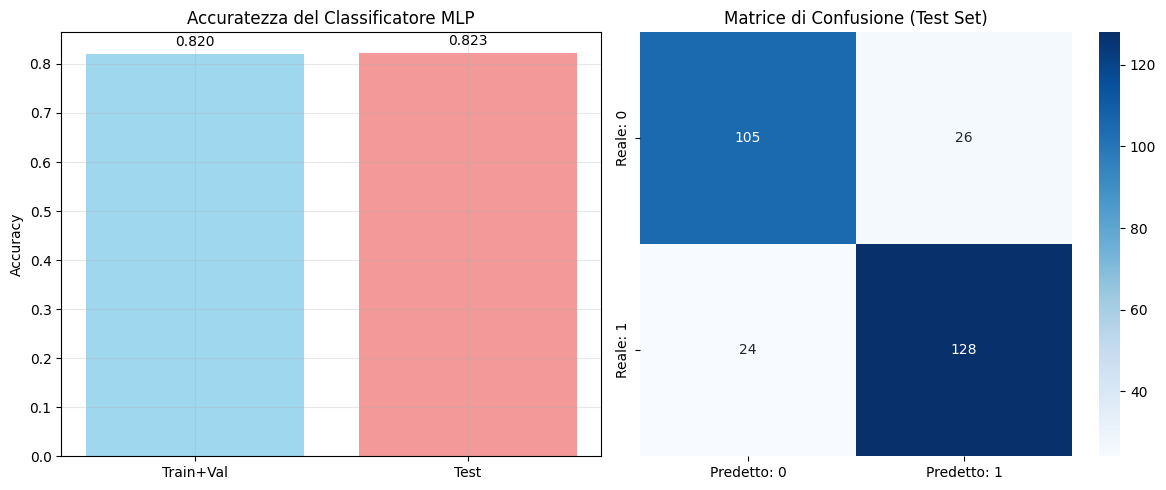


INFORMAZIONI TRAINING:
Numero di epoche eseguite: 419
Loss finale: 0.394384


In [ ]:
# Performance del modello
y_pred_trainval_cb = mlp.predict(X_trainval_cb)
y_pred_test_cb = mlp.predict(X_test_cb)

# Accuratezza per training+validation e test set
acc_trainval = accuracy_score(y_trainval_cb, y_pred_trainval_cb)
acc_test = accuracy_score(y_test_cb, y_pred_test_cb)

# DataFrame con le performance
performance_df = pd.DataFrame({
    'Accuracy': [acc_trainval, acc_test]
}, index=['Train+Val', 'Test'])

print("PERFORMANCE DEL CLASSIFICATORE MLP CANNABIS BINARIA")
print("=" * 50)
display(performance_df.round(4))

# Matrice di confusione
cm_test = confusion_matrix(y_test_cb, y_pred_test_cb)
cm_df = pd.DataFrame(cm_test,
                     columns=['Predetto: 0', 'Predetto: 1'],
                     index=['Reale: 0', 'Reale: 1'])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafico a barre dell'accuratezza
train_test = ['Train+Val', 'Test']
accuracies = [acc_trainval, acc_test]

axes[0].bar(train_test, accuracies, alpha=0.8, color=['skyblue', 'lightcoral'])
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuratezza del Classificatore MLP')
axes[0].grid(True, alpha=0.3)

for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Heatmap della matrice di confusione
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Matrice di Confusione (Test Set)')

plt.tight_layout()
plt.show()

# Informazioni aggiuntive sul training
print(f"\nINFORMAZIONI TRAINING:")
print(f"Numero di epoche eseguite: {mlp.n_iter_}")
print(f"Loss finale: {mlp.loss_:.6f}")

# Support Vector Machines (SVMs)

## Idee generali e obiettivo

Le Support Vector Machines rappresentano uno degli algoritmi di machine learning per la classificazione. L'idea centrale è semplice: quando dobbiamo separare due classi di dati, invece di accontentarci di qualsiasi linea di separazione che funzioni, cerchiamo quella "migliore" possibile.

Ma cosa significa "migliore": Gli SVM introducono il concetto di *margine massimo: la linea di separazione ottimale è quella che massimizza la distanza dalle osservazioni più vicine di entrambe le classi. Queste osservazioni critiche, che "toccano" i confini del margine, sono chiamate **support vectors* e danno il nome all'algoritmo.

Un aspetto profondo degli SVM è il *kernel trick*, che permette di risolvere problemi non lineari trasformandoli matematicamente in spazi di dimensioni superiori dove diventano lineari, senza mai calcolare esplicitamente questa trasformazione.

## Hard SVM e Soft SVM

### Dataset e Notazione
Consideriamo un dataset $S = \{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_m, y_m)\}$ dove:
- $\mathbf{x}_i \in \mathbb{R}^d$ sono i vettori delle features  
- $y_i \in \{+1, -1\}$ sono le etichette delle classi
- $m = |S|$ è la dimensione del dataset

### Iperpiano Separatore
Definiamo l'iperpiano $H_{\boldsymbol{\omega},b}$ come:
$$H_{\boldsymbol{\omega},b} = \{\mathbf{x} \in \mathbb{R}^d \mid \boldsymbol{\omega}^T \mathbf{x} + b = 0\}$$

dove:
- $\boldsymbol{\omega} \in \mathbb{R}^d$ è il vettore normale all'iperpiano
- $b \in \mathbb{R}$ è il termine di bias

### Etichettatura delle Classi
$$y_i = \begin{cases} 
+1 & \text{se } \mathbf{x}_i \in \text{Classe 1} \\
-1 & \text{se } \mathbf{x}_i \in \text{Classe 2}
\end{cases}$$

### Distanza dall'iperpiano
La distanza euclidea di un punto $\mathbf{x}$ dall'iperpiano è:
$$\text{dist}(H_{\boldsymbol{\omega},b}, \mathbf{x}) = \frac{|\boldsymbol{\omega}^T \mathbf{x} + b|}{||\boldsymbol{\omega}||}$$

## Hard SVM (Margine Rigido)

### Definizione del Margine
Il **margine** è la minima distanza tra l'iperpiano e i punti del dataset:
$$M_{\boldsymbol{\omega},b} = 2 \cdot \min_{\mathbf{x} \in S} \text{dist}(H_{\boldsymbol{\omega},b}, \mathbf{x})$$

### Support Vectors
Un vettore $\mathbf{x}_i$ è chiamato **support vector** se si trova sul margine. I support vectors sono i punti più importanti perché determinano completamente l'iperpiano separatore.

### Problema di Ottimizzazione

#### Formulazione Intuitiva
Cerchiamo di massimizzare il margine:
$$\arg \max_{(\boldsymbol{\omega}, b) : ||\boldsymbol{\omega}|| = 1} \min_{i \in \{1,\ldots,m\}} |\langle\boldsymbol{\omega}, \mathbf{x}_i\rangle + b|$$

soggetto a:
$$y_i(\langle\boldsymbol{\omega}, \mathbf{x}_i\rangle + b) > 0, \quad \forall i = 1, \ldots, m$$

#### Formulazione Standard
Equivalentemente, possiamo **minimizzare** $||\boldsymbol{\omega}||^2$ (che massimizza il margine):

$$\arg \min_{\boldsymbol{\omega}, b} \frac{1}{2}||\boldsymbol{\omega}||^2$$

soggetto a:
$$y_i(\langle\boldsymbol{\omega}, \mathbf{x}_i\rangle + b) \geq 1, \quad \forall i = 1, \ldots, m$$

### Problema Duale
Applicando i moltiplicatori di Lagrange e le condizioni KKT:

$$\max_{\boldsymbol{\alpha}} \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i,j=1}^m \alpha_i \alpha_j y_i y_j \langle\mathbf{x}_i, \mathbf{x}_j\rangle$$

soggetto a:
- $\sum_{i=1}^m \alpha_i y_i = 0$
- $\alpha_i \geq 0, \quad \forall i = 1, \ldots, m$

### Funzione di Decisione
$$h(\mathbf{x}) = \text{sign}\left(\sum_{i=1}^m \alpha_i y_i \langle\mathbf{x}_i, \mathbf{x}\rangle + b\right)$$

dove:
$$b = y_j - \sum_{i=1}^m \alpha_i y_i \langle\mathbf{x}_i, \mathbf{x}_j\rangle \quad \forall\mathbf{x}_j \text{ Support Vector}$$

### Condizioni di Ottimalità
$$\alpha_i = \begin{cases} 
0 & \text{se } \mathbf{x}_i \text{ non è support vector} \\
\neq 0 & \text{se } \mathbf{x}_i \text{ è support vector}
\end{cases}$$


## Soft SVM (Margine Morbido)

### Motivazione
Spesso è difficile o impossibile separare perfettamente i dati con un iperpiano. La **Hard SVM** non ammette violazioni del margine, mentre la **Soft SVM** permette alcune violazioni controllate.

### Variabili Slack
Introduciamo le **variabili slack** $\xi_i \geq 0$ che rappresentano il "prezzo da pagare" per attraversare il margine:

- $\xi_i = 0$: punto correttamente classificato fuori dal margine
- $0 < \xi_i < 1$: punto correttamente classificato ma dentro il margine  
- $\xi_i \geq 1$: punto misclassificato

### Problema di Ottimizzazione

$$\arg \min_{\boldsymbol{\omega}, b, \boldsymbol{\xi}} \frac{1}{2}||\boldsymbol{\omega}||^2 + C \sum_{i=1}^m \xi_i$$

soggetto a:
- $y_i(\langle\boldsymbol{\omega}, \mathbf{x}_i\rangle + b) \geq 1 - \xi_i, \quad \forall i = 1, \ldots, m$
- $\xi_i \geq 0, \quad \forall i = 1, \ldots, m$

### Parametro di Regolarizzazione C

Il parametro $C$ controlla il **trade-off** tra:
- **Massimizzazione del margine**: termine $\frac{1}{2}||\boldsymbol{\omega}||^2$
- **Minimizzazione degli errori**: termine $C \sum_{i=1}^m \xi_i$

#### Comportamento di C:
- **$C \to 0$**: margine massimo, molte violazioni permesse (underfitting)
- **$C \to \infty$**: si avvicina alla Hard SVM, poche violazioni (overfitting)
- **$C$ intermedio**: bilanciamento ottimale

### Problema Duale
$$\max_{\boldsymbol{\alpha}} \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i,j=1}^m \alpha_i \alpha_j y_i y_j \langle\mathbf{x}_i, \mathbf{x}_j\rangle$$

soggetto a:
- $\sum_{i=1}^m \alpha_i y_i = 0$
- $0 \leq \alpha_i \leq C, \quad \forall i = 1, \ldots, m$

**Differenza chiave**: ora abbiamo il vincolo superiore $\alpha_i \leq C$.

### Funzione di Decisione
$$h(\mathbf{x}) = \text{sign}\left(\sum_{i=1}^m \alpha_i y_i \langle\mathbf{x}_i, \mathbf{x}\rangle + b\right)$$

dove:
$$b = y_i - \sum_{j=1}^m \alpha_j y_j \langle\mathbf{x}_j, \mathbf{x}_i\rangle \quad \forall\mathbf{x}_i \text{ con } 0 < \alpha_i < C$$

### Classificazione dei Support Vectors
$$\alpha_i = \begin{cases} 
0 & \text{se } \mathbf{x}_i \text{ non è support vector} \\
0 < \alpha_i < C & \text{se } \mathbf{x}_i \text{ è support vector sul margine} \\
\alpha_i = C & \text{se } \mathbf{x}_i \text{ è support vector che viola il margine}
\end{cases}$$


## Osservazioni

1. **La Soft SVM generalizza la Hard SVM**: quando $C \to \infty$, la Soft SVM converge alla Hard SVM.

2. **I support vectors determinano completamente la soluzione**: solo i punti con $\alpha_i > 0$ influenzano la funzione di decisione.

3. **Il kernel trick si applica a entrambe**: sostituendo $\langle\mathbf{x}_i, \mathbf{x}_j\rangle$ con $K(\mathbf{x}_i, \mathbf{x}_j)$ possiamo gestire problemi non lineari.

4. **La scelta di $C$ è cruciale**: richiede validazione incrociata per trovare il valore ottimale.
## Il Kernel Trick

### Motivazione
La separazione lineare è spesso insufficiente. Il kernel trick permette di mappare i dati in uno spazio di dimensioni superiori $\Phi : X \rightarrow F$ dove possono diventare linearmente separabili, senza calcolare esplicitamente la mappatura.

### Definizione
Una *funzione kernel* $K : X \times X \rightarrow \mathbb{R}$ soddisfa:
$$K(\mathbf{x}_i, \mathbf{x}_j) = \langle \Phi(\mathbf{x}_i), \Phi(\mathbf{x}_j) \rangle$$

### Condizione PDS (Positive Definite Symmetric)
Un kernel è valido se per qualsiasi insieme $\{\mathbf{x}1, \ldots, \mathbf{x}_m\} \subseteq X$, la matrice di Gram $\mathbf{K} = [K(\mathbf{x}_i, \mathbf{x}_j)]{ij}$ è simmetrica e semi-definita positiva:

$$\mathbf{c}^T \mathbf{K} \mathbf{c} = \sum_{i,j=1}^m c_i c_j K(\mathbf{x}_i, \mathbf{x}_j) \geq 0 \quad \forall \mathbf{c} \in \mathbb{R}^{m}$$

### Kernels Standard

*Kernel Polinomiale:*
$$K(\mathbf{x}, \mathbf{y}) = (\langle \mathbf{x}, \mathbf{y} \rangle + c)^d, \quad c > 0$$

*Kernel Gaussiano (RBF):*
$$K(\mathbf{x}, \mathbf{y}) = \exp\left(-\frac{||\mathbf{x} - \mathbf{y}||^2}{2\sigma^2}\right), \quad \sigma \neq 0$$

*Kernel Sigmoide:*
$$K(\mathbf{x}, \mathbf{y}) = \tanh(a(\mathbf{x} \cdot \mathbf{y}) + b), \quad a, b \geq 0$$

### Esempio: Kernel Polinomiale di Grado 2
Per $\mathbf{x} = [x_1, x_2]$ e $d = 2$:

$$K(\mathbf{x}, \mathbf{y}) = (\mathbf{x} \cdot \mathbf{y} + c)^2$$

Espandendo:
$$= (x_1 y_1 + x_2 y_2 + c)^2$$
$$= \begin{bmatrix} x_1^2 \\ x_2^2 \\ \sqrt{2}x_1 x_2 \\ \sqrt{2c}x_1 \\ \sqrt{2c}x_2 \\ c \end{bmatrix}^T \begin{bmatrix} y_1^2 \\ y_2^2 \\ \sqrt{2}y_1 y_2 \\ \sqrt{2c}y_1 \\ \sqrt{2c}y_2 \\ c \end{bmatrix}$$

Il kernel calcola questo prodotto scalare 6-dimensionale senza mai costruire esplicitamente i vettori trasformati!

### SVM con Kernel
Sostituiamo $\langle \mathbf{x}_i, \mathbf{x}_j \rangle$ con $K(\mathbf{x}_i, \mathbf{x}_j)$ nella formulazione duale:

$$\max_{\boldsymbol{\alpha}} \sum_{i=1}^m \alpha_i - \frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m \alpha_i\alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j)$$

La funzione di decisione diventa:
$$h(\mathbf{x}) = \text{sign}\left(\sum_{i=1}^m \alpha_i y_i K(\mathbf{x}, \mathbf{x}_i) + b\right)$$

#### Scelta del Kernel

-⁠⁠  **Lineare**: Dati già separabili o molto alta dimensionalità

-⁠⁠  **Polinomiale**: Relazioni polinomiali tra features

-⁠  **RBF**: Universal approximator, buon default

-⁠  ⁠**Compositi**: Combinazioni per catturare pattern complessi

In [ ]:
# Facciamo SVM con kernel RBF

# C = direzza dell'iperpiano
# gamma = varianza della gaussiana (reciproco)
# 
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_rbf.fit(X_trainval_cb, y_trainval_cb)
y_pred_rbf = svm_rbf.predict(X_test_cb)

print(f"\nSVM RBF Base - F1 Score: {f1_score(y_test_cb, y_pred_rbf):.4f}")

# Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],                         # Durezza del soft margin
    'gamma': ['scale', 'auto', 0.001, 0.01]         # Parametro di scala per il kernel RBF
}

grid_search = GridSearchCV(
    SVC(kernel='rbf', probability=True, random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_trainval_cb, y_trainval_cb)

print(f"Migliori parametri: {grid_search.best_params_}")
print(f"Miglior F1 (CV): {grid_search.best_score_:.4f}")
print(f"Accuratezza incrememntata di: {grid_search.best_score_ - f1_score(y_test_cb, y_pred_rbf):.4f}")


SVM RBF Base - F1 Score: 0.8173
Migliori parametri: {'C': 0.1, 'gamma': 'auto'}
Miglior F1 (CV): 0.8259
Accuratezza incrememntata di: 0.0087


Accuratezza SVM: 0.8304


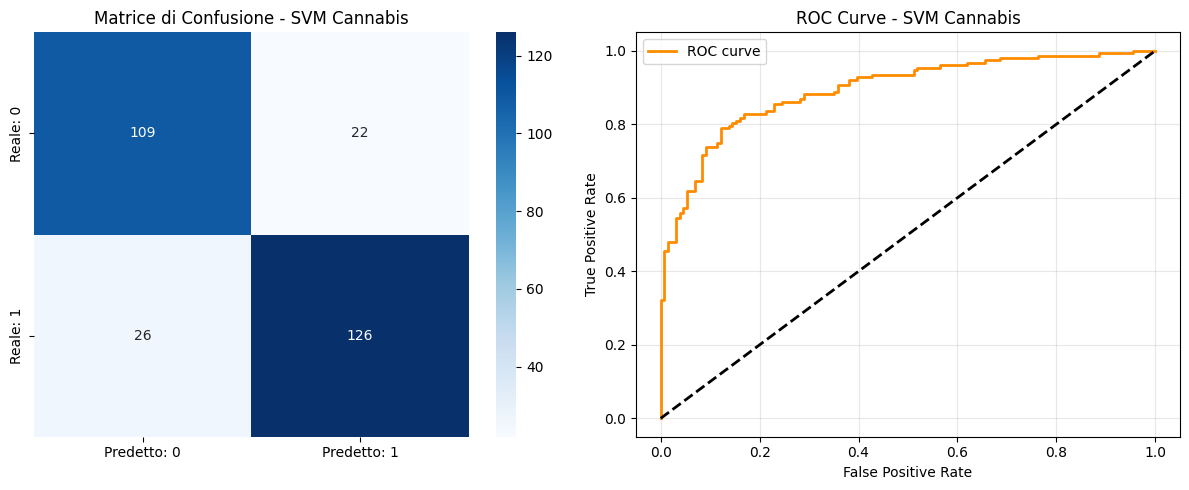

In [ ]:
# Valuazione del modello ottimizzato

# Modello ottimizzato
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_cb)

acc = accuracy_score(y_test_cb, y_pred_best)

print(f"Accuratezza SVM: {acc:.4f}")

# Visualizzazione
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
cm = confusion_matrix(y_test_cb, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Predetto: 0', 'Predetto: 1'],
            yticklabels=['Reale: 0', 'Reale: 1'])
ax1.set_title('Matrice di Confusione - SVM Cannabis')

# ROC Curve
y_score = best_svm.predict_proba(X_test_cb)[:, 1]
fpr, tpr, _ = roc_curve(y_test_cb, y_score)

ax2.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve')
ax2.plot([0, 1], [0, 1], 'k--', lw=2)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - SVM Cannabis')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

,Kernel,Accuracy
0,RBF,0.8304
1,Linear,0.8233
2,Poly,0.8163
3,Sigmoid,0.7703


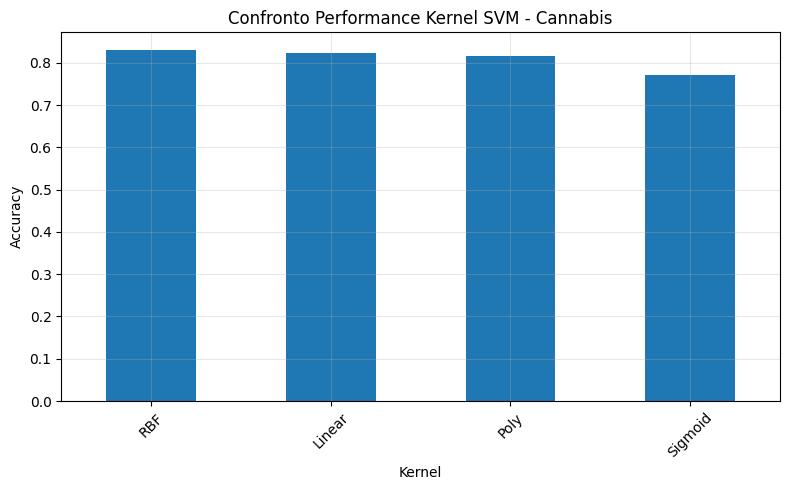

In [ ]:
# Confronto kernel diversi
kernels = {
    'RBF': SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], probability=True, random_state=42),
    'Linear': SVC(kernel='linear', C=1.0, probability=True, random_state=42),
    'Poly': SVC(kernel='poly', degree=3, C=1.0, probability=True, random_state=42),
    'Sigmoid': SVC(kernel='sigmoid', C=1.0, probability=True, random_state=42)
}

kernel_results = []
for name, model in kernels.items():
    model.fit(X_trainval_cb, y_trainval_cb)
    y_pred = model.predict(X_test_cb)
    
    kernel_results.append({
        'Kernel': name,
        'Accuracy': accuracy_score(y_test_cb, y_pred)
    })

kernel_df = pd.DataFrame(kernel_results)
display(kernel_df.round(4))

# Grafico confronto
kernel_df.set_index('Kernel')['Accuracy'].plot(kind='bar', figsize=(8, 5))
plt.title('Confronto Performance Kernel SVM - Cannabis')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

,Modello,Accuracy
0,MLP,0.8233
1,SVM RBF Ottimizzato,0.8304


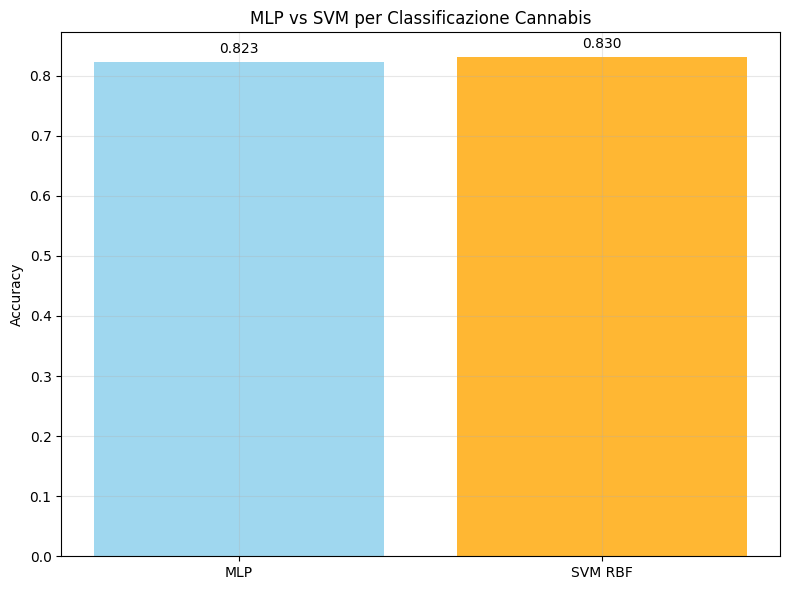

In [ ]:
# Confronto finale MLP vs SVM
confronto_cannabis = pd.DataFrame({
    'Modello': ['MLP', 'SVM RBF Ottimizzato'],
    'Accuracy': [acc_test, acc]
})

display(confronto_cannabis.round(4))

# Visualizzazione confronto
fig, ax = plt.subplots(figsize=(8, 6))

mlp_acc = acc_test
svm_acc = acc

modelli = ['MLP', 'SVM RBF']
accuracies = [mlp_acc, svm_acc]

ax.bar(modelli, accuracies, alpha=0.8, color=['skyblue', 'orange'])
ax.set_ylabel('Accuracy')
ax.set_title('MLP vs SVM per Classificazione Cannabis')
ax.grid(True, alpha=0.3)


for i, v in enumerate(accuracies):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()